In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# seperater is ', '. Therefore " ?" has to be given in na_values
df = pd.read_csv(r'income.csv', na_values=[" ?"])

In [3]:
df.head(10)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
5,44,Private,HS-grad,Widowed,Exec-managerial,Unmarried,Black,Female,0,0,40,United-States,"less than or equal to 50,000"
6,51,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,"less than or equal to 50,000"
7,20,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
9,19,Private,HS-grad,Never-married,Machine-op-inspct,Own-child,Black,Female,0,0,40,United-States,"less than or equal to 50,000"


In [4]:
df['SalStat'].value_counts()

 less than or equal to 50,000    24283
 greater than 50,000              7695
Name: SalStat, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
age              31978 non-null int64
JobType          30169 non-null object
EdType           31978 non-null object
maritalstatus    31978 non-null object
occupation       30162 non-null object
relationship     31978 non-null object
race             31978 non-null object
gender           31978 non-null object
capitalgain      31978 non-null int64
capitalloss      31978 non-null int64
hoursperweek     31978 non-null int64
nativecountry    31978 non-null object
SalStat          31978 non-null object
dtypes: int64(4), object(9)
memory usage: 2.1+ MB


## Handling Null Values

In [6]:
df.isna().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [7]:
df.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [8]:
df1 = df.copy(deep=True)

In [9]:
# filling NaN values with previous values in 'JobType' column
df['JobType'].fillna(method='ffill', inplace=True)

In [10]:
df.head(10)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
5,44,Private,HS-grad,Widowed,Exec-managerial,Unmarried,Black,Female,0,0,40,United-States,"less than or equal to 50,000"
6,51,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,"less than or equal to 50,000"
7,20,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
8,17,Private,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
9,19,Private,HS-grad,Never-married,Machine-op-inspct,Own-child,Black,Female,0,0,40,United-States,"less than or equal to 50,000"


In [11]:
df.isna().sum()

age                 0
JobType             0
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [12]:
# filling NaN values with previous values in 'occupation' column
df['occupation'].fillna(method='ffill', inplace=True)

In [13]:
df.head(10)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
5,44,Private,HS-grad,Widowed,Exec-managerial,Unmarried,Black,Female,0,0,40,United-States,"less than or equal to 50,000"
6,51,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,"less than or equal to 50,000"
7,20,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
8,17,Private,11th,Never-married,Machine-op-inspct,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
9,19,Private,HS-grad,Never-married,Machine-op-inspct,Own-child,Black,Female,0,0,40,United-States,"less than or equal to 50,000"


In [14]:
df.isna().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [15]:
df.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

## Data Visualization

In [16]:
from collections import *

In [17]:
df['SalStat'].value_counts()

 less than or equal to 50,000    24283
 greater than 50,000              7695
Name: SalStat, dtype: int64

In [18]:
df1 = df[df['SalStat']==' less than or equal to 50,000']
len(df1)

24283

In [19]:
df2 = df[df['SalStat']==' greater than 50,000']
len(df2)

7695

### 'JobType'

In [20]:
df['JobType'].value_counts()

 Private             23660
 Self-emp-not-inc     2641
 Local-gov            2177
 State-gov            1358
 Self-emp-inc         1134
 Federal-gov           986
 Without-pay            15
 Never-worked            7
Name: JobType, dtype: int64

In [21]:
d1 = df1['JobType'].value_counts().to_dict()
d2 = df2['JobType'].value_counts().to_dict()
absentFromD2 = set(d1.keys()) - set (d2.keys())
absentFromD1 = set(d2.keys()) - set (d1.keys())
for i in absentFromD2:
    d2[i] = 0
for i in absentFromD1:
    d1[i] = 0
d1 = OrderedDict(sorted(d1.items()))
d2 = OrderedDict(sorted(d2.items()))

In [22]:
d1

OrderedDict([(' Federal-gov', 617),
             (' Local-gov', 1554),
             (' Never-worked', 7),
             (' Private', 18647),
             (' Self-emp-inc', 526),
             (' Self-emp-not-inc', 1906),
             (' State-gov', 1011),
             (' Without-pay', 15)])

In [23]:
d2

OrderedDict([(' Federal-gov', 369),
             (' Local-gov', 623),
             (' Never-worked', 0),
             (' Private', 5013),
             (' Self-emp-inc', 608),
             (' Self-emp-not-inc', 735),
             (' State-gov', 347),
             (' Without-pay', 0)])

In [24]:
print(len(d1), len(d2))

8 8


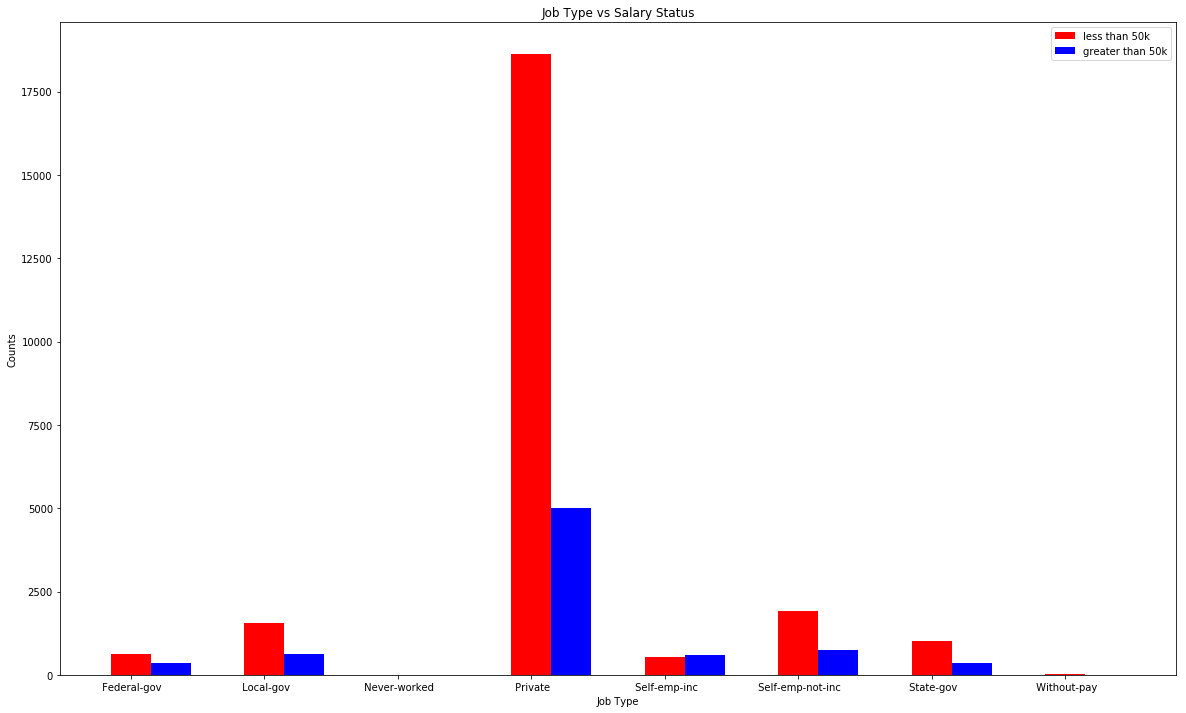

In [25]:
x1 = np.arange(len(d1))
x2 = np.arange(len(d2))
width = 0.3

plt.figure(figsize=(20,12))

plt.bar(x1, list(d1.values()), label='less than 50k', color='red', width = 0.3)
plt.bar(x2+width, list(d2.values()), label='greater than 50k', color='blue', width = 0.3)


plt.legend()

plt.title('Job Type vs Salary Status')
plt.xlabel('Job Type')
plt.ylabel('Counts')
plt.xticks(x1, list(d1.keys()))

plt.show()

1. Highest number of people getting salary less than as well as greater than 50k are of private job type.

### 'EdType'

In [26]:
df['EdType'].value_counts()

 HS-grad         10368
 Some-college     7187
 Bachelors        5210
 Masters          1674
 Assoc-voc        1366
 11th             1167
 Assoc-acdm       1055
 10th              921
 7th-8th           627
 Prof-school       559
 9th               506
 12th              417
 Doctorate         390
 5th-6th           318
 1st-4th           163
 Preschool          50
Name: EdType, dtype: int64

In [27]:
d1 = df1['EdType'].value_counts().to_dict()
d2 = df2['EdType'].value_counts().to_dict()
absentFromD2 = set(d1.keys()) - set (d2.keys())
absentFromD1 = set(d2.keys()) - set (d1.keys())
for i in absentFromD2:
    d2[i] = 0
for i in absentFromD1:
    d1[i] = 0
d1 = OrderedDict(sorted(d1.items()))
d2 = OrderedDict(sorted(d2.items()))

In [28]:
d1

OrderedDict([(' 10th', 860),
             (' 11th', 1108),
             (' 12th', 386),
             (' 1st-4th', 157),
             (' 5th-6th', 304),
             (' 7th-8th', 590),
             (' 9th', 480),
             (' Assoc-acdm', 793),
             (' Assoc-voc', 1009),
             (' Bachelors', 3041),
             (' Doctorate', 99),
             (' HS-grad', 8706),
             (' Masters', 738),
             (' Preschool', 50),
             (' Prof-school', 145),
             (' Some-college', 5817)])

In [29]:
d2

OrderedDict([(' 10th', 61),
             (' 11th', 59),
             (' 12th', 31),
             (' 1st-4th', 6),
             (' 5th-6th', 14),
             (' 7th-8th', 37),
             (' 9th', 26),
             (' Assoc-acdm', 262),
             (' Assoc-voc', 357),
             (' Bachelors', 2169),
             (' Doctorate', 291),
             (' HS-grad', 1662),
             (' Masters', 936),
             (' Preschool', 0),
             (' Prof-school', 414),
             (' Some-college', 1370)])

In [30]:
print(len(d1), len(d2))

16 16


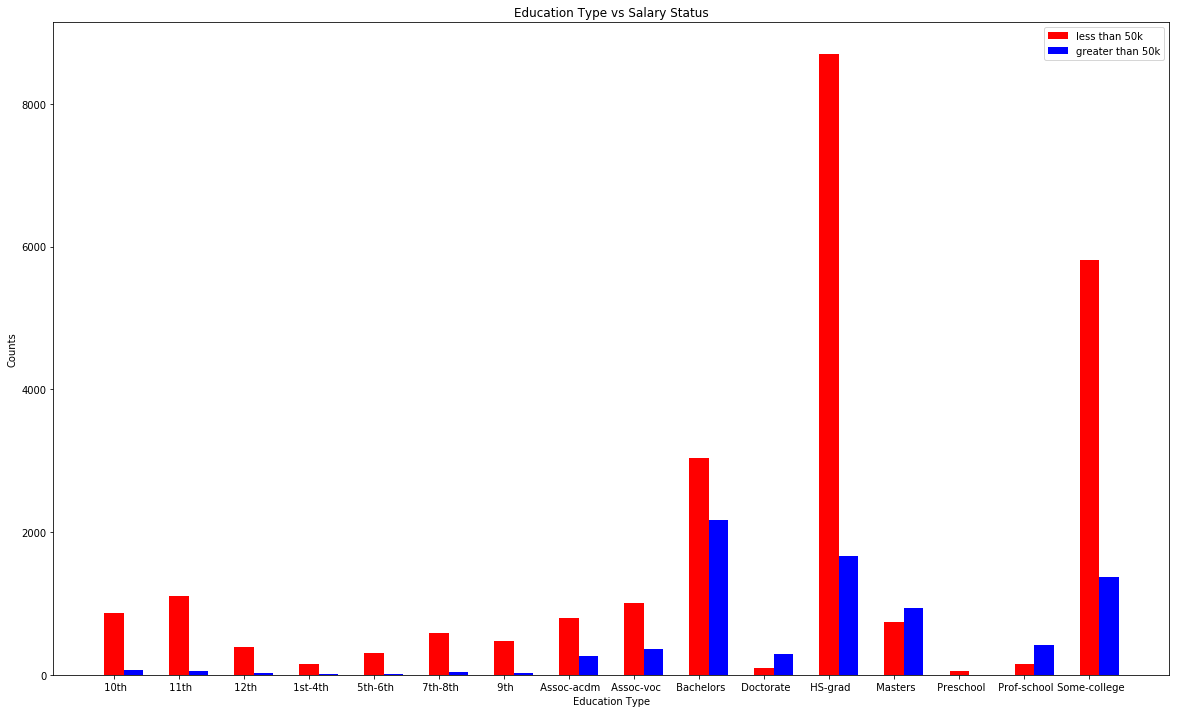

In [31]:
x1 = np.arange(len(d1))
x2 = np.arange(len(d2))
width = 0.3

plt.figure(figsize=(20,12))

plt.bar(x1, list(d1.values()), label='less than 50k', color='red', width = 0.3)
plt.bar(x2+width, list(d2.values()), label='greater than 50k', color='blue', width = 0.3)


plt.legend()

plt.title('Education Type vs Salary Status')
plt.xlabel('Education Type')
plt.ylabel('Counts')
plt.xticks(x1, list(d1.keys()))

plt.show()

1. HS-grad has highest number of count of salary greater than as well as less than 50k
2. Ed Type of Masters, Doctorate and Prof-school have more counts of greater than 50k
3. There is a huge difference in counts of less than 50k and greater than 50k of Ed Type Some-college

### 'maritalstatus'

In [32]:
df['maritalstatus'].value_counts()

 Married-civ-spouse       14692
 Never-married            10488
 Divorced                  4394
 Separated                 1005
 Widowed                    979
 Married-spouse-absent      397
 Married-AF-spouse           23
Name: maritalstatus, dtype: int64

In [33]:
d1 = df1['maritalstatus'].value_counts().to_dict()
d2 = df2['maritalstatus'].value_counts().to_dict()
absentFromD2 = set(d1.keys()) - set (d2.keys())
absentFromD1 = set(d2.keys()) - set (d1.keys())
for i in absentFromD2:
    d2[i] = 0
for i in absentFromD1:
    d1[i] = 0
d1 = OrderedDict(sorted(d1.items()))
d2 = OrderedDict(sorted(d2.items()))

In [34]:
d1

OrderedDict([(' Divorced', 3936),
             (' Married-AF-spouse', 13),
             (' Married-civ-spouse', 8126),
             (' Married-spouse-absent', 365),
             (' Never-married', 10009),
             (' Separated', 939),
             (' Widowed', 895)])

In [35]:
d2

OrderedDict([(' Divorced', 458),
             (' Married-AF-spouse', 10),
             (' Married-civ-spouse', 6566),
             (' Married-spouse-absent', 32),
             (' Never-married', 479),
             (' Separated', 66),
             (' Widowed', 84)])

In [36]:
print(len(d1), len(d2))

7 7


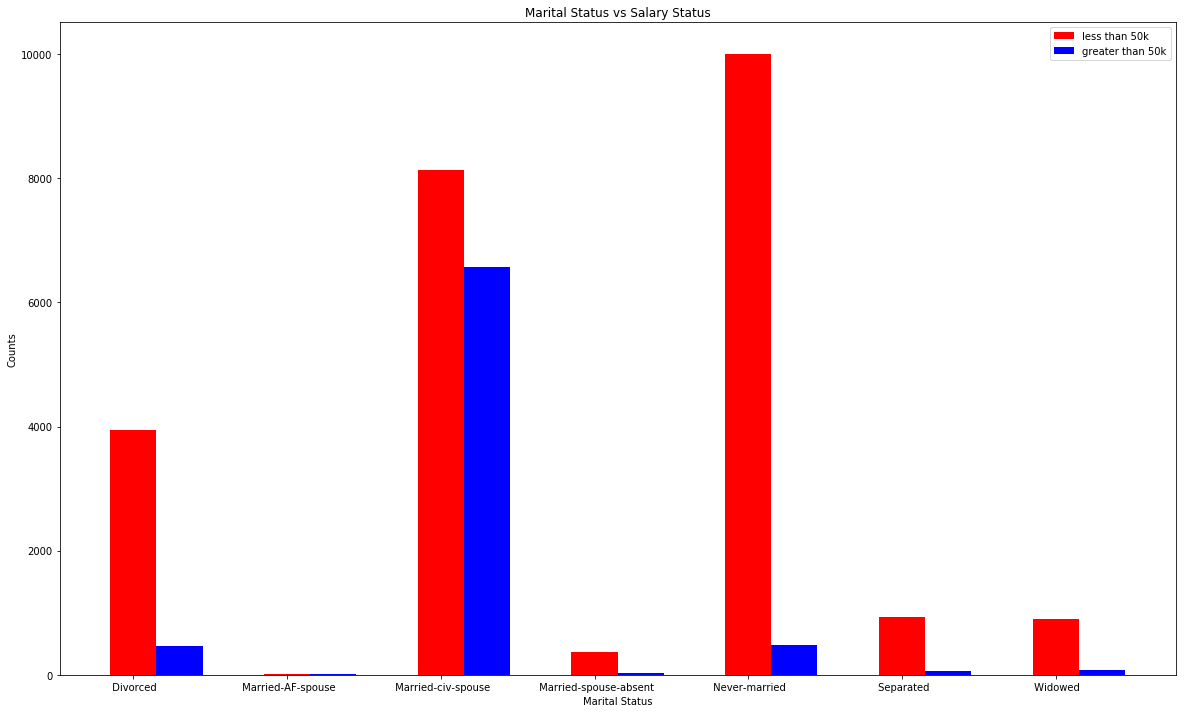

In [37]:
x1 = np.arange(len(d1))
x2 = np.arange(len(d2))
width = 0.3

plt.figure(figsize=(20,12))

plt.bar(x1, list(d1.values()), label='less than 50k', color='red', width = 0.3)
plt.bar(x2+width, list(d2.values()), label='greater than 50k', color='blue', width = 0.3)


plt.legend()

plt.title('Marital Status vs Salary Status')
plt.xlabel('Marital Status')
plt.ylabel('Counts')
plt.xticks(x1, list(d1.keys()))

plt.show()

1. People with never married status has highest count of less than 50k. 
2. Also there is a highest difference in counts of <50k and >50k counts of Never-married
3. Married-civ-spouce has highest count of >50k

### 'occupation'

In [38]:
df['occupation'].value_counts()

 Craft-repair         4291
 Prof-specialty       4279
 Exec-managerial      4241
 Adm-clerical         3929
 Sales                3797
 Other-service        3384
 Machine-op-inspct    2096
 Transport-moving     1673
 Handlers-cleaners    1449
 Farming-fishing      1033
 Tech-support          964
 Protective-serv       679
 Priv-house-serv       153
 Armed-Forces           10
Name: occupation, dtype: int64

In [39]:
d1 = df1['occupation'].value_counts().to_dict()
d2 = df2['occupation'].value_counts().to_dict()
absentFromD2 = set(d1.keys()) - set (d2.keys())
absentFromD1 = set(d2.keys()) - set (d1.keys())
for i in absentFromD2:
    d2[i] = 0
for i in absentFromD1:
    d1[i] = 0
d1 = OrderedDict(sorted(d1.items()))
d2 = OrderedDict(sorted(d2.items()))

In [40]:
d1

OrderedDict([(' Adm-clerical', 3405),
             (' Armed-Forces', 9),
             (' Craft-repair', 3360),
             (' Exec-managerial', 2282),
             (' Farming-fishing', 910),
             (' Handlers-cleaners', 1355),
             (' Machine-op-inspct', 1838),
             (' Other-service', 3230),
             (' Priv-house-serv', 152),
             (' Prof-specialty', 2443),
             (' Protective-serv', 467),
             (' Sales', 2807),
             (' Tech-support', 679),
             (' Transport-moving', 1346)])

In [41]:
d2

OrderedDict([(' Adm-clerical', 524),
             (' Armed-Forces', 1),
             (' Craft-repair', 931),
             (' Exec-managerial', 1959),
             (' Farming-fishing', 123),
             (' Handlers-cleaners', 94),
             (' Machine-op-inspct', 258),
             (' Other-service', 154),
             (' Priv-house-serv', 1),
             (' Prof-specialty', 1836),
             (' Protective-serv', 212),
             (' Sales', 990),
             (' Tech-support', 285),
             (' Transport-moving', 327)])

In [42]:
print(len(d1), len(d2))

14 14


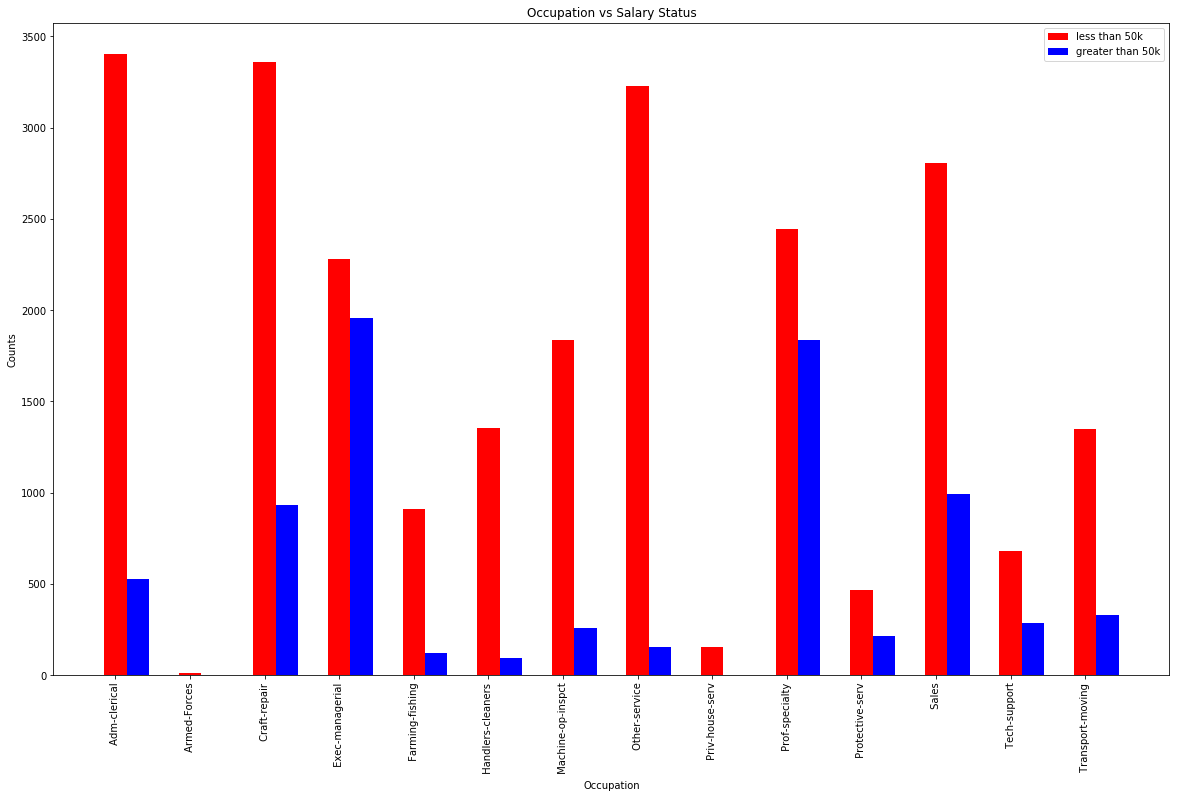

In [43]:
x1 = np.arange(len(d1))
x2 = np.arange(len(d2))
width = 0.3

plt.figure(figsize=(20,12))

plt.bar(x1, list(d1.values()), label='less than 50k', color='red', width = 0.3)
plt.bar(x2+width, list(d2.values()), label='greater than 50k', color='blue', width = 0.3)


plt.legend()

plt.title('Occupation vs Salary Status')
plt.xlabel('Occupation')
plt.ylabel('Counts')
plt.xticks(x1, list(d1.keys()), rotation='vertical')

plt.show()

1. Highest number of >50k counts is in Exec-managerial and Prof-speciality occupation
2. Highest difference of >50k and <50k counts is in Other-service occupation
3. Highest count of <50k is in Adm-clerical occupation

### 'relationship'

In [44]:
df['relationship'].value_counts()

 Husband           12947
 Not-in-family      8156
 Own-child          5005
 Unmarried          3384
 Wife               1534
 Other-relative      952
Name: relationship, dtype: int64

In [45]:
d1 = df1['relationship'].value_counts().to_dict()
d2 = df2['relationship'].value_counts().to_dict()
absentFromD2 = set(d1.keys()) - set (d2.keys())
absentFromD1 = set(d2.keys()) - set (d1.keys())
for i in absentFromD2:
    d2[i] = 0
for i in absentFromD1:
    d1[i] = 0
d1 = OrderedDict(sorted(d1.items()))
d2 = OrderedDict(sorted(d2.items()))

In [46]:
d1

OrderedDict([(' Husband', 7141),
             (' Not-in-family', 7315),
             (' Other-relative', 916),
             (' Own-child', 4940),
             (' Unmarried', 3169),
             (' Wife', 802)])

In [47]:
d2

OrderedDict([(' Husband', 5806),
             (' Not-in-family', 841),
             (' Other-relative', 36),
             (' Own-child', 65),
             (' Unmarried', 215),
             (' Wife', 732)])

In [48]:
print(len(d1), len(d2))

6 6


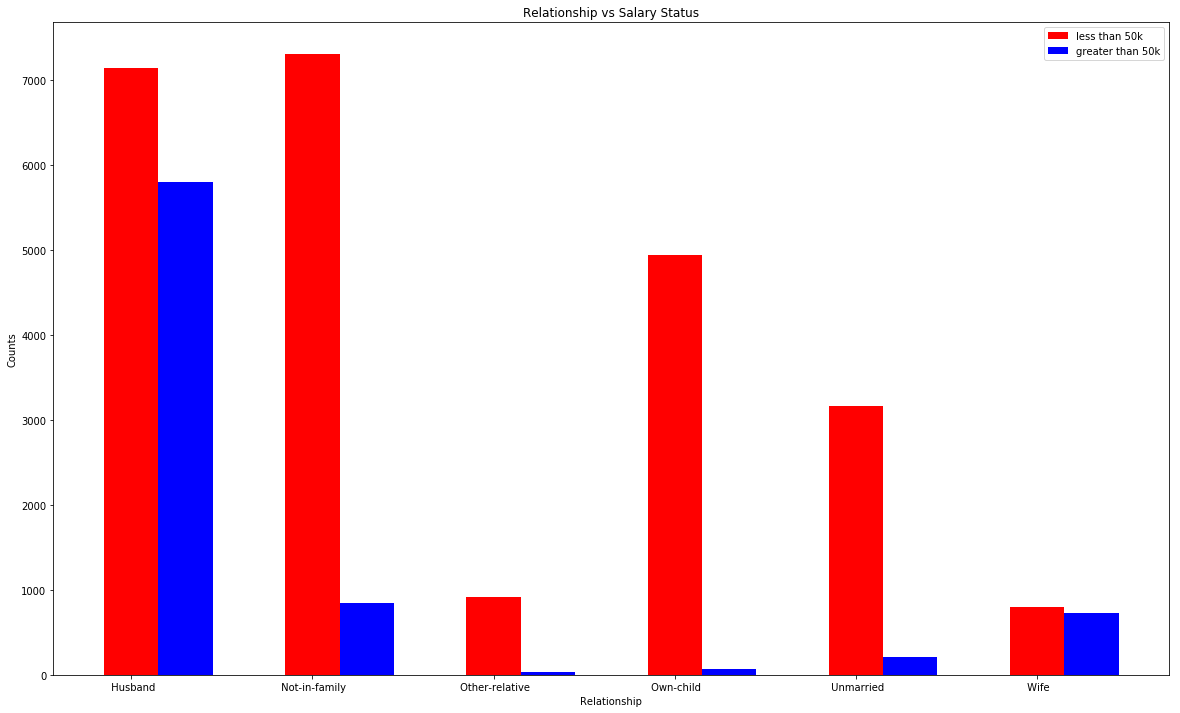

In [49]:
x1 = np.arange(len(d1))
x2 = np.arange(len(d2))
width = 0.3

plt.figure(figsize=(20,12))

plt.bar(x1, list(d1.values()), label='less than 50k', color='red', width = 0.3)
plt.bar(x2+width, list(d2.values()), label='greater than 50k', color='blue', width = 0.3)


plt.legend()

plt.title('Relationship vs Salary Status')
plt.xlabel('Relationship')
plt.ylabel('Counts')
plt.xticks(x1, list(d1.keys()))

plt.show()

1. Highest count of <50k and >50k is of husband category
2. Highest difference between two target classes is in not-in-family category whereas lowest difference is in wife category
3. Other-relative category has lowest count of >50k

### 'race'

In [50]:
df['race'].value_counts()

 White                 27430
 Black                  3028
 Asian-Pac-Islander      956
 Amer-Indian-Eskimo      311
 Other                   253
Name: race, dtype: int64

In [51]:
d1 = df1['race'].value_counts().to_dict()
d2 = df2['race'].value_counts().to_dict()
absentFromD2 = set(d1.keys()) - set (d2.keys())
absentFromD1 = set(d2.keys()) - set (d1.keys())
for i in absentFromD2:
    d2[i] = 0
for i in absentFromD1:
    d1[i] = 0
d1 = OrderedDict(sorted(d1.items()))
d2 = OrderedDict(sorted(d2.items()))

In [52]:
d1

OrderedDict([(' Amer-Indian-Eskimo', 275),
             (' Asian-Pac-Islander', 703),
             (' Black', 2654),
             (' Other', 231),
             (' White', 20420)])

In [53]:
d2

OrderedDict([(' Amer-Indian-Eskimo', 36),
             (' Asian-Pac-Islander', 253),
             (' Black', 374),
             (' Other', 22),
             (' White', 7010)])

In [54]:
print(len(d1), len(d2))

5 5


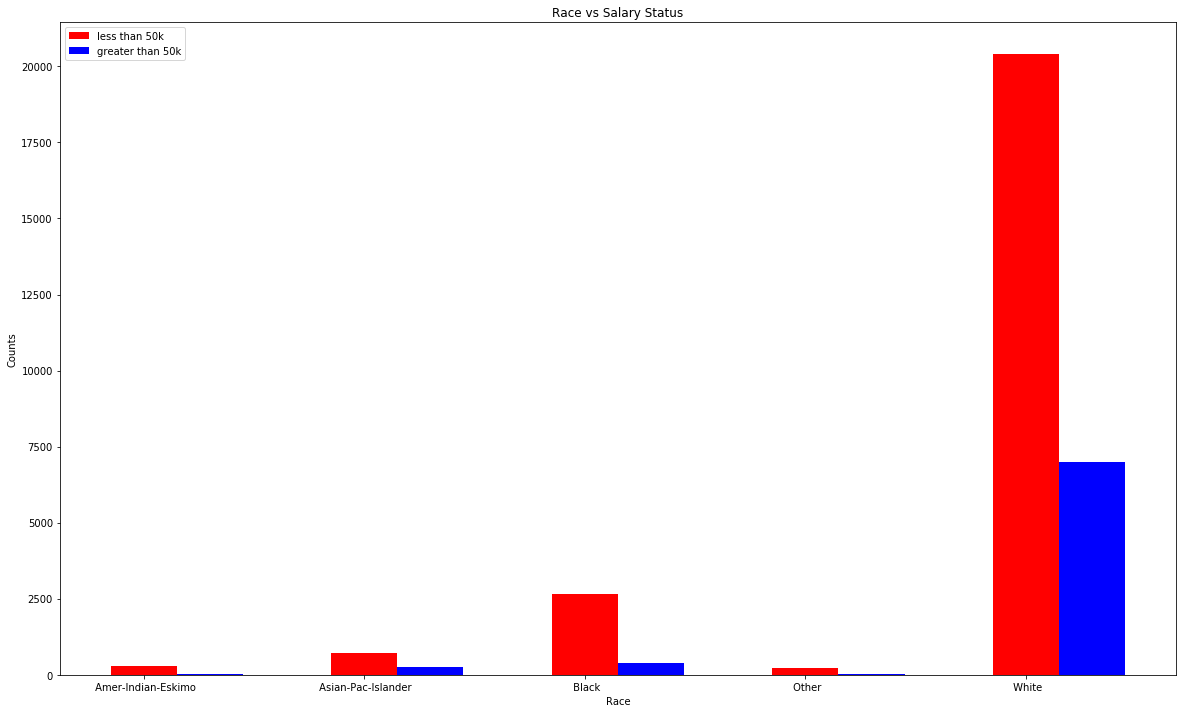

In [55]:
x1 = np.arange(len(d1))
x2 = np.arange(len(d2))
width = 0.3

plt.figure(figsize=(20,12))

plt.bar(x1, list(d1.values()), label='less than 50k', color='red', width = 0.3)
plt.bar(x2+width, list(d2.values()), label='greater than 50k', color='blue', width = 0.3)


plt.legend()

plt.title('Race vs Salary Status')
plt.xlabel('Race')
plt.ylabel('Counts')
plt.xticks(x1, list(d1.keys()))

plt.show()

1. White category has the highest count of <50k and >50k
2. American-Indian-Eskimo have lowest counts of both classes

### 'gender'

In [56]:
df['gender'].value_counts()

 Male      21370
 Female    10608
Name: gender, dtype: int64

In [57]:
d1 = df1['gender'].value_counts().to_dict()
d2 = df2['gender'].value_counts().to_dict()
absentFromD2 = set(d1.keys()) - set (d2.keys())
absentFromD1 = set(d2.keys()) - set (d1.keys())
for i in absentFromD2:
    d2[i] = 0
for i in absentFromD1:
    d1[i] = 0
d1 = OrderedDict(sorted(d1.items()))
d2 = OrderedDict(sorted(d2.items()))

In [58]:
d1

OrderedDict([(' Female', 9446), (' Male', 14837)])

In [59]:
d2

OrderedDict([(' Female', 1162), (' Male', 6533)])

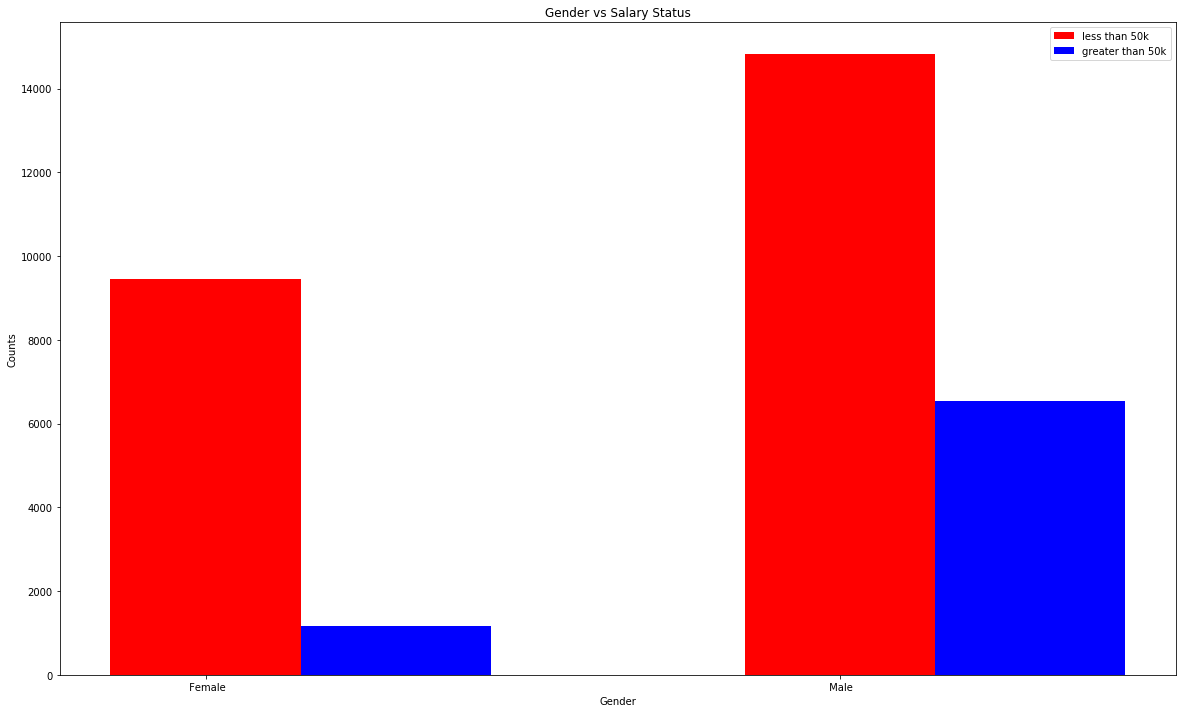

In [60]:
x1 = np.arange(len(d1))
x2 = np.arange(len(d2))
width = 0.3

plt.figure(figsize=(20,12))

plt.bar(x1, list(d1.values()), label='less than 50k', color='red', width = 0.3)
plt.bar(x2+width, list(d2.values()), label='greater than 50k', color='blue', width = 0.3)


plt.legend()

plt.title('Gender vs Salary Status')
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.xticks(x1, list(d1.keys()))

plt.show()

1. Males have higher counts of both classes
2. Difference between <50k and >50k counts is almost same for both males and females

### 'nativecountry'

In [61]:
df['nativecountry'].value_counts()

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece                           29
 

In [62]:
d1 = df1['nativecountry'].value_counts().to_dict()
d2 = df2['nativecountry'].value_counts().to_dict()
absentFromD2 = set(d1.keys()) - set (d2.keys())
absentFromD1 = set(d2.keys()) - set (d1.keys())
for i in absentFromD2:
    d2[i] = 0
for i in absentFromD1:
    d1[i] = 0
d1 = OrderedDict(sorted(d1.items()))
d2 = OrderedDict(sorted(d2.items()))

In [63]:
d1

OrderedDict([(' Cambodia', 12),
             (' Canada', 82),
             (' China', 55),
             (' Columbia', 57),
             (' Cuba', 70),
             (' Dominican-Republic', 68),
             (' Ecuador', 24),
             (' El-Salvador', 97),
             (' England', 60),
             (' France', 17),
             (' Germany', 93),
             (' Greece', 21),
             (' Guatemala', 61),
             (' Haiti', 40),
             (' Holand-Netherlands', 1),
             (' Honduras', 12),
             (' Hong', 14),
             (' Hungary', 10),
             (' India', 60),
             (' Iran', 25),
             (' Ireland', 19),
             (' Italy', 48),
             (' Jamaica', 71),
             (' Japan', 38),
             (' Laos', 16),
             (' Mexico', 610),
             (' Nicaragua', 32),
             (' Outlying-US(Guam-USVI-etc)', 14),
             (' Peru', 29),
             (' Philippines', 137),
             (' Poland', 48),
            

In [64]:
d2

OrderedDict([(' Cambodia', 7),
             (' Canada', 39),
             (' China', 20),
             (' Columbia', 2),
             (' Cuba', 25),
             (' Dominican-Republic', 2),
             (' Ecuador', 4),
             (' El-Salvador', 9),
             (' England', 30),
             (' France', 12),
             (' Germany', 44),
             (' Greece', 8),
             (' Guatemala', 3),
             (' Haiti', 4),
             (' Holand-Netherlands', 0),
             (' Honduras', 1),
             (' Hong', 6),
             (' Hungary', 3),
             (' India', 40),
             (' Iran', 18),
             (' Ireland', 5),
             (' Italy', 25),
             (' Jamaica', 10),
             (' Japan', 24),
             (' Laos', 2),
             (' Mexico', 33),
             (' Nicaragua', 2),
             (' Outlying-US(Guam-USVI-etc)', 0),
             (' Peru', 2),
             (' Philippines', 61),
             (' Poland', 12),
             (' Portugal', 4),

In [65]:
print(len(d1), len(d2))

41 41


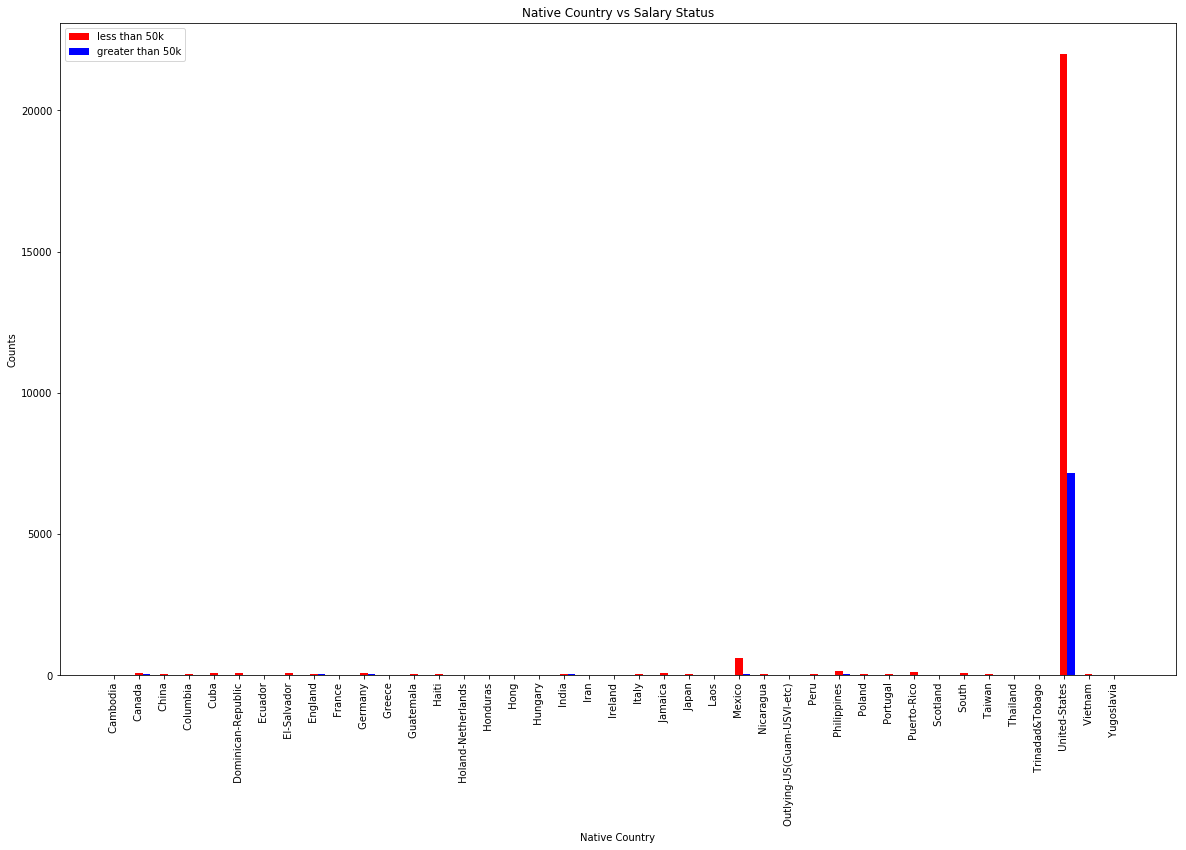

In [66]:
x1 = np.arange(len(d1))
x2 = np.arange(len(d2))
width = 0.3

plt.figure(figsize=(20,12))

plt.bar(x1, list(d1.values()), label='less than 50k', color='red', width = 0.3)
plt.bar(x2+width, list(d2.values()), label='greater than 50k', color='blue', width = 0.3)


plt.legend()

plt.title('Native Country vs Salary Status')
plt.xlabel('Native Country')
plt.ylabel('Counts')
plt.xticks(x1, list(d1.keys()), rotation='vertical')

plt.show()

1. The database is biased. The count of united states is above 20,000 for <50k and above 8000 for >50
2. While count of other countries is less than 100 for both <50k and >50k.
3. Mexico has some considerable count of <50k. Else the dataset is biased in sace of 'nativecountry' field

### 'age'

In [67]:
d1 = df1['age'].value_counts().to_dict()
d2 = df2['age'].value_counts().to_dict()
absentFromD2 = set(d1.keys()) - set (d2.keys())
absentFromD1 = set(d2.keys()) - set (d1.keys())
for i in absentFromD2:
    d2[i] = 0
for i in absentFromD1:
    d1[i] = 0
d1 = OrderedDict(sorted(d1.items()))
d2 = OrderedDict(sorted(d2.items()))

In [68]:
d1

OrderedDict([(17, 393),
             (18, 542),
             (19, 705),
             (20, 743),
             (21, 706),
             (22, 741),
             (23, 859),
             (24, 753),
             (25, 777),
             (26, 705),
             (27, 741),
             (28, 731),
             (29, 669),
             (30, 673),
             (31, 691),
             (32, 623),
             (33, 671),
             (34, 625),
             (35, 648),
             (36, 618),
             (37, 548),
             (38, 534),
             (39, 526),
             (40, 518),
             (41, 513),
             (42, 493),
             (43, 488),
             (44, 437),
             (45, 436),
             (46, 436),
             (47, 413),
             (48, 324),
             (49, 369),
             (50, 333),
             (51, 349),
             (52, 281),
             (53, 274),
             (54, 240),
             (55, 266),
             (56, 240),
             (57, 223),
             (58

In [69]:
d2

OrderedDict([(17, 0),
             (18, 0),
             (19, 2),
             (20, 0),
             (21, 3),
             (22, 12),
             (23, 12),
             (24, 31),
             (25, 53),
             (26, 62),
             (27, 79),
             (28, 117),
             (29, 132),
             (30, 169),
             (31, 179),
             (32, 188),
             (33, 191),
             (34, 237),
             (35, 210),
             (36, 257),
             (37, 288),
             (38, 273),
             (39, 271),
             (40, 264),
             (41, 273),
             (42, 263),
             (43, 268),
             (44, 277),
             (45, 281),
             (46, 286),
             (47, 283),
             (48, 214),
             (49, 204),
             (50, 256),
             (51, 239),
             (52, 188),
             (53, 186),
             (54, 170),
             (55, 141),
             (56, 116),
             (57, 130),
             (58, 121),
        

In [70]:
print(len(d1), len(d2))

73 73


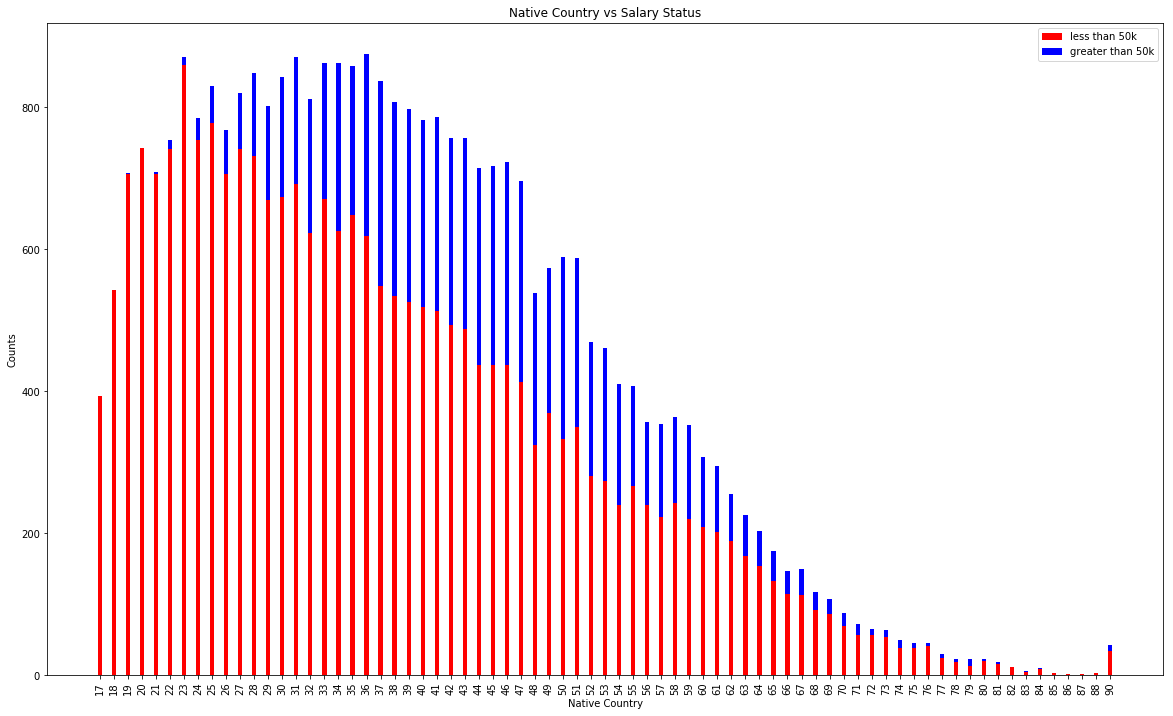

In [71]:
x1 = np.arange(len(d1))
x2 = np.arange(len(d2))
width = 0.3

plt.figure(figsize=(20,12))

plt.bar(x1, list(d1.values()), label='less than 50k', color='red', width = 0.3)
plt.bar(x2, list(d2.values()), label='greater than 50k', color='blue', width = 0.3, bottom=list(d1.values()))


plt.legend()

plt.title('Native Country vs Salary Status')
plt.xlabel('Native Country')
plt.ylabel('Counts')
plt.xticks(x1, list(d1.keys()), rotation='vertical')

plt.show()

1. Highest count of <50k is of age 21
2. Gughest ciunt of >50k is in age range of 40 to 50

### 'capitalgain'

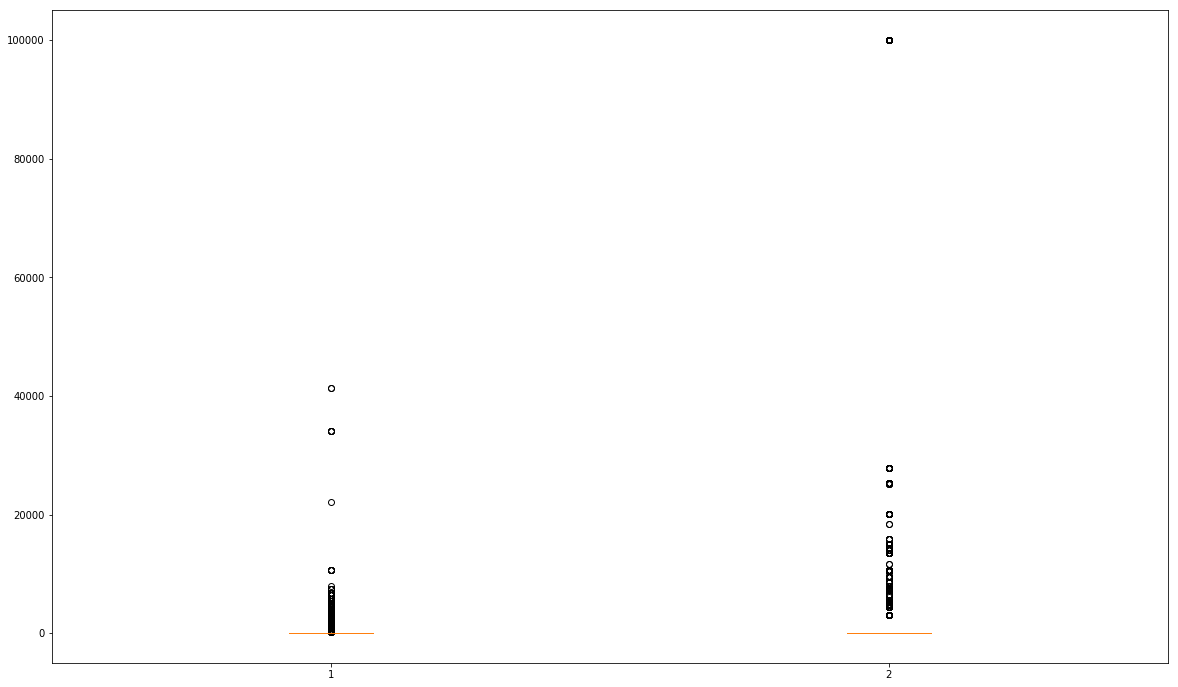

In [72]:
plt.figure(figsize=(20,12))

plt.boxplot([df1['capitalgain'], df2['capitalgain']])
plt.show()

### 'capitalloss'

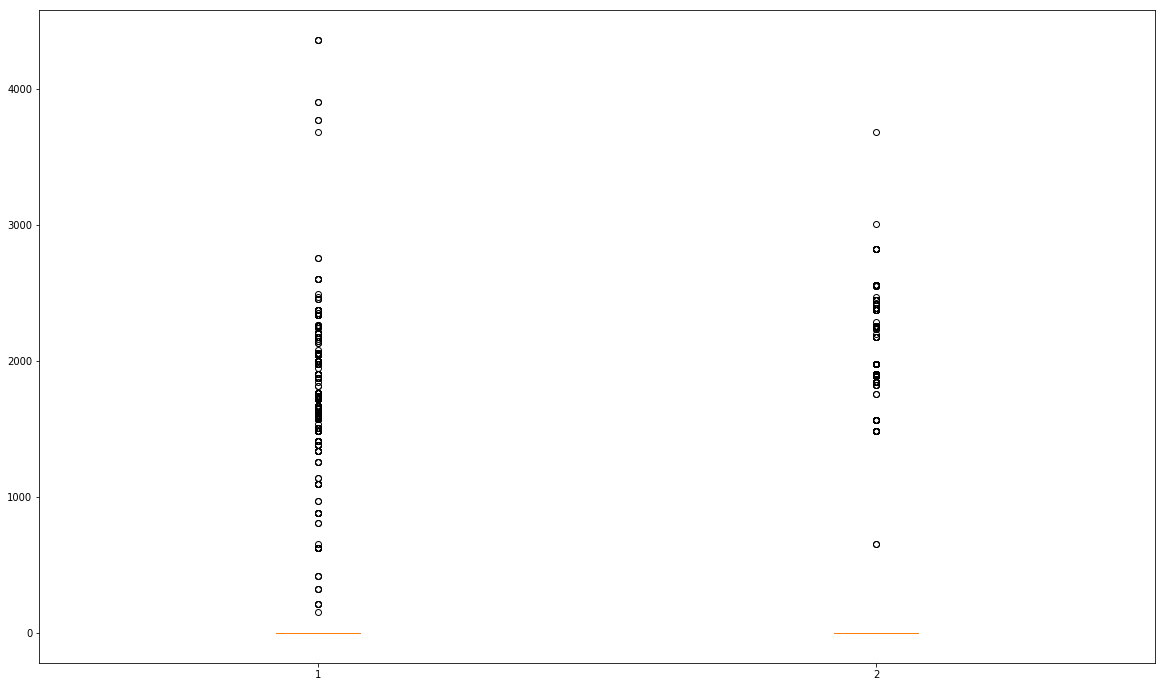

In [73]:
plt.figure(figsize=(20,12))

plt.boxplot([df1['capitalloss'], df2['capitalloss']])
plt.show()

### 'hoursperweek'

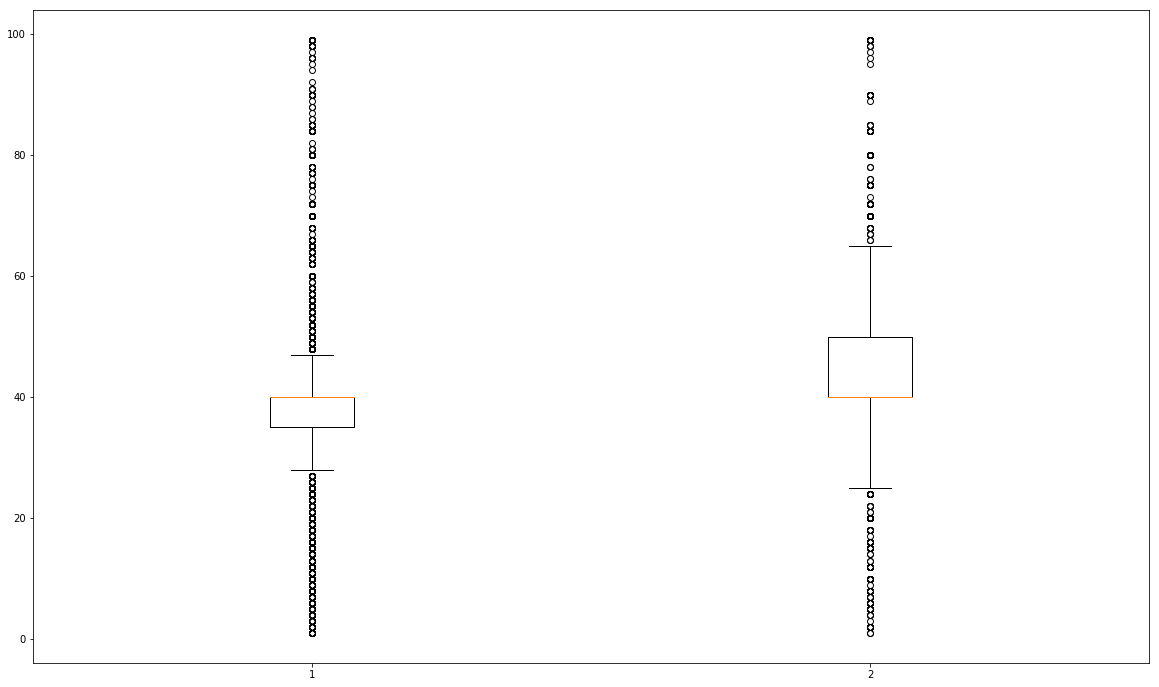

In [74]:
plt.figure(figsize=(20,12))

plt.boxplot([df1['hoursperweek'], df2['hoursperweek']])
plt.show()

## Encoding of Categorical values

In [75]:
data = df.copy(deep=True)

In [76]:
data.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [77]:
df['JobType'].value_counts()

 Private             23660
 Self-emp-not-inc     2641
 Local-gov            2177
 State-gov            1358
 Self-emp-inc         1134
 Federal-gov           986
 Without-pay            15
 Never-worked            7
Name: JobType, dtype: int64

### Label encoding for 'JobType'

In [78]:
job_type_map = {' Never-worked': 1,
                ' Without-pay': 2,
                ' Self-emp-not-inc': 3,
                ' Self-emp-inc': 4,
                ' Local-gov': 5,
                ' State-gov': 6,
                ' Federal-gov': 7,
                ' Private': 8
               }

In [79]:
df['job_type'] = df['JobType'].map(job_type_map)

In [80]:
df.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat,job_type
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000",8
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000",7
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000",8
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000",8
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000",8


In [81]:
df.drop("JobType", axis=1, inplace=True)

In [82]:
df.head()

,age,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat,job_type
0,45,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000",8
1,24,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000",7
2,44,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000",8
3,27,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000",8
4,20,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000",8


In [83]:
df['EdType'].value_counts()

 HS-grad         10368
 Some-college     7187
 Bachelors        5210
 Masters          1674
 Assoc-voc        1366
 11th             1167
 Assoc-acdm       1055
 10th              921
 7th-8th           627
 Prof-school       559
 9th               506
 12th              417
 Doctorate         390
 5th-6th           318
 1st-4th           163
 Preschool          50
Name: EdType, dtype: int64

### Label encoding for 'EdType'

In [84]:
education_map = {' Preschool': 1,
                 ' 1st-4th': 2,
                 ' 5th-6th': 3,
                 ' 7th-8th': 4,
                 ' 9th': 5,
                 ' 10th': 6,
                 ' 11th': 7,
                 ' 12th': 8,
                 ' Prof-school': 9,
                 ' Assoc-voc': 10,
                 ' Assoc-acdm': 11,
                 ' HS-grad': 12,
                 ' Some-college': 13,
                 ' Bachelors': 14,
                 ' Masters': 15,
                 ' Doctorate': 16
                }

In [85]:
df['ed_type'] = df['EdType'].map(education_map)

In [86]:
df.head()

,age,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat,job_type,ed_type
0,45,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000",8,12
1,24,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000",7,12
2,44,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000",8,13
3,27,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000",8,5
4,20,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000",8,13


In [87]:
df.drop("EdType", axis=1, inplace=True)

In [88]:
df.head()

,age,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat,job_type,ed_type
0,45,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000",8,12
1,24,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000",7,12
2,44,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000",8,13
3,27,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000",8,5
4,20,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000",8,13


In [89]:
df['maritalstatus'].value_counts()

 Married-civ-spouse       14692
 Never-married            10488
 Divorced                  4394
 Separated                 1005
 Widowed                    979
 Married-spouse-absent      397
 Married-AF-spouse           23
Name: maritalstatus, dtype: int64

### One hot encoding for 'maritalstatus'

In [90]:
# Married-spouse-absent and Married-AF-spouse have very less counts
# Replacing them with Other can merging theme to one category
df['maritalstatus'].replace(to_replace=[' Married-spouse-absent', 'Married-AF-spouse'],
                               value='Other', inplace=True
                              )

In [91]:
df.tail(11)

,age,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat,job_type,ed_type
31967,80,Widowed,Prof-specialty,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000",5,12
31968,17,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000",5,7
31969,40,Other,Prof-specialty,Not-in-family,White,Female,2174,0,40,United-States,"less than or equal to 50,000",3,14
31970,30,Married-civ-spouse,Other-service,Wife,White,Female,0,0,25,United-States,"greater than 50,000",8,11
31971,27,Never-married,Craft-repair,Own-child,Asian-Pac-Islander,Male,0,1980,40,Philippines,"less than or equal to 50,000",8,13
31972,33,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,"greater than 50,000",8,15
31973,34,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000",5,12
31974,34,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000",5,13
31975,23,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000",8,13
31976,42,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000",5,13


In [92]:
df = pd.get_dummies(df, columns=['maritalstatus'])

In [93]:
df.head()

,age,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat,job_type,ed_type,maritalstatus_ Divorced,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed,maritalstatus_Other
0,45,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000",8,12,1,0,0,0,0,0,0
1,24,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000",7,12,0,0,0,1,0,0,0
2,44,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000",8,13,0,0,1,0,0,0,0
3,27,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000",8,5,0,0,0,1,0,0,0
4,20,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000",8,13,0,0,0,1,0,0,0


In [94]:
df['occupation'].value_counts()

 Craft-repair         4291
 Prof-specialty       4279
 Exec-managerial      4241
 Adm-clerical         3929
 Sales                3797
 Other-service        3384
 Machine-op-inspct    2096
 Transport-moving     1673
 Handlers-cleaners    1449
 Farming-fishing      1033
 Tech-support          964
 Protective-serv       679
 Priv-house-serv       153
 Armed-Forces           10
Name: occupation, dtype: int64

### Label encoding for 'occupation'

In [95]:
labelEncoder = LabelEncoder()
df['occupation_type'] = labelEncoder.fit_transform(df['occupation'])

In [96]:
df.head()

,age,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat,job_type,ed_type,maritalstatus_ Divorced,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed,maritalstatus_Other,occupation_type
0,45,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000",8,12,1,0,0,0,0,0,0,0
1,24,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000",7,12,0,0,0,1,0,0,0,1
2,44,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000",8,13,0,0,1,0,0,0,0,9
3,27,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000",8,5,0,0,0,1,0,0,0,2
4,20,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000",8,13,0,0,0,1,0,0,0,11


In [97]:
df.drop('occupation', axis=1, inplace=True)

In [98]:
df.head()

,age,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat,job_type,ed_type,maritalstatus_ Divorced,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed,maritalstatus_Other,occupation_type
0,45,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000",8,12,1,0,0,0,0,0,0,0
1,24,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000",7,12,0,0,0,1,0,0,0,1
2,44,Husband,White,Male,0,0,40,United-States,"greater than 50,000",8,13,0,0,1,0,0,0,0,9
3,27,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000",8,5,0,0,0,1,0,0,0,2
4,20,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000",8,13,0,0,0,1,0,0,0,11


In [99]:
df['relationship'].value_counts()

 Husband           12947
 Not-in-family      8156
 Own-child          5005
 Unmarried          3384
 Wife               1534
 Other-relative      952
Name: relationship, dtype: int64

### One hot encoding for 'relationship'

In [100]:
df = pd.get_dummies(df, columns=['relationship'])

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 24 columns):
age                                  31978 non-null int64
race                                 31978 non-null object
gender                               31978 non-null object
capitalgain                          31978 non-null int64
capitalloss                          31978 non-null int64
hoursperweek                         31978 non-null int64
nativecountry                        31978 non-null object
SalStat                              31978 non-null object
job_type                             31978 non-null int64
ed_type                              31978 non-null int64
maritalstatus_ Divorced              31978 non-null uint8
maritalstatus_ Married-AF-spouse     31978 non-null uint8
maritalstatus_ Married-civ-spouse    31978 non-null uint8
maritalstatus_ Never-married         31978 non-null uint8
maritalstatus_ Separated             31978 non-null uint8
maritalstatus_ Wi

In [102]:
df['race'].value_counts()

 White                 27430
 Black                  3028
 Asian-Pac-Islander      956
 Amer-Indian-Eskimo      311
 Other                   253
Name: race, dtype: int64

### One hot encoding for 'race'

In [103]:
# Amer-Indian-Eskimo has very less counts. Converting it to Other category
df['race'].replace(to_replace=' Amer-Indian-Eskimo',
                               value='Other', inplace=True
                              )

In [104]:
df['race'].replace(to_replace=' Other',
                               value='Other', inplace=True
                              )

In [105]:
df.head(10)

,age,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat,job_type,ed_type,...,maritalstatus_ Separated,maritalstatus_ Widowed,maritalstatus_Other,occupation_type,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,45,White,Female,0,0,28,United-States,"less than or equal to 50,000",8,12,...,0,0,0,0,0,1,0,0,0,0
1,24,White,Male,0,0,40,United-States,"less than or equal to 50,000",7,12,...,0,0,0,1,0,0,0,1,0,0
2,44,White,Male,0,0,40,United-States,"greater than 50,000",8,13,...,0,0,0,9,1,0,0,0,0,0
3,27,White,Male,0,0,40,Mexico,"less than or equal to 50,000",8,5,...,0,0,0,2,0,0,1,0,0,0
4,20,White,Male,0,0,35,United-States,"less than or equal to 50,000",8,13,...,0,0,0,11,0,1,0,0,0,0
5,44,Black,Female,0,0,40,United-States,"less than or equal to 50,000",8,12,...,0,1,0,3,0,0,0,0,1,0
6,51,Other,Male,0,0,40,United-States,"less than or equal to 50,000",8,12,...,0,0,0,2,1,0,0,0,0,0
7,20,White,Male,0,0,40,United-States,"less than or equal to 50,000",8,12,...,0,0,0,6,1,0,0,0,0,0
8,17,White,Female,0,0,5,United-States,"less than or equal to 50,000",8,7,...,0,0,0,6,0,0,0,1,0,0
9,19,Black,Female,0,0,40,United-States,"less than or equal to 50,000",8,12,...,0,0,0,6,0,0,0,1,0,0


In [106]:
df['race'].value_counts()

 White                 27430
 Black                  3028
 Asian-Pac-Islander      956
Other                    564
Name: race, dtype: int64

In [107]:
df = pd.get_dummies(df, columns=['race'])

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 27 columns):
age                                  31978 non-null int64
gender                               31978 non-null object
capitalgain                          31978 non-null int64
capitalloss                          31978 non-null int64
hoursperweek                         31978 non-null int64
nativecountry                        31978 non-null object
SalStat                              31978 non-null object
job_type                             31978 non-null int64
ed_type                              31978 non-null int64
maritalstatus_ Divorced              31978 non-null uint8
maritalstatus_ Married-AF-spouse     31978 non-null uint8
maritalstatus_ Married-civ-spouse    31978 non-null uint8
maritalstatus_ Never-married         31978 non-null uint8
maritalstatus_ Separated             31978 non-null uint8
maritalstatus_ Widowed               31978 non-null uint8
maritalstatus_Othe

In [109]:
df['gender'].value_counts()

 Male      21370
 Female    10608
Name: gender, dtype: int64

### One hot encoding for 'gender'

In [110]:
df = pd.get_dummies(df, columns=['gender'])

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 28 columns):
age                                  31978 non-null int64
capitalgain                          31978 non-null int64
capitalloss                          31978 non-null int64
hoursperweek                         31978 non-null int64
nativecountry                        31978 non-null object
SalStat                              31978 non-null object
job_type                             31978 non-null int64
ed_type                              31978 non-null int64
maritalstatus_ Divorced              31978 non-null uint8
maritalstatus_ Married-AF-spouse     31978 non-null uint8
maritalstatus_ Married-civ-spouse    31978 non-null uint8
maritalstatus_ Never-married         31978 non-null uint8
maritalstatus_ Separated             31978 non-null uint8
maritalstatus_ Widowed               31978 non-null uint8
maritalstatus_Other                  31978 non-null uint8
occupation_type    

In [112]:
df['nativecountry'].value_counts()

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece                           29
 

### One hot encoding for 'nativecountry'

In [113]:
#Replacing United-State with USA
df['nativecountry'].replace(to_replace=' United-States',
                               value=' USA', inplace=True
                              )

In [114]:
df.head()

,age,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat,job_type,ed_type,maritalstatus_ Divorced,maritalstatus_ Married-AF-spouse,...,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ White,race_Other,gender_ Female,gender_ Male
0,45,0,0,28,USA,"less than or equal to 50,000",8,12,1,0,...,0,0,0,0,0,0,1,0,1,0
1,24,0,0,40,USA,"less than or equal to 50,000",7,12,0,0,...,0,1,0,0,0,0,1,0,0,1
2,44,0,0,40,USA,"greater than 50,000",8,13,0,0,...,0,0,0,0,0,0,1,0,0,1
3,27,0,0,40,Mexico,"less than or equal to 50,000",8,5,0,0,...,1,0,0,0,0,0,1,0,0,1
4,20,0,0,35,USA,"less than or equal to 50,000",8,13,0,0,...,0,0,0,0,0,0,1,0,0,1


In [115]:
countries = list(df['nativecountry'].unique())
countries

[' USA',
 ' Mexico',
 ' Portugal',
 ' El-Salvador',
 ' Poland',
 ' France',
 ' Puerto-Rico',
 ' Canada',
 ' Cuba',
 ' Taiwan',
 ' Philippines',
 ' South',
 ' Dominican-Republic',
 ' Jamaica',
 ' Honduras',
 ' Haiti',
 ' Germany',
 ' Guatemala',
 ' England',
 ' Italy',
 ' China',
 ' India',
 ' Japan',
 ' Yugoslavia',
 ' Iran',
 ' Thailand',
 ' Peru',
 ' Outlying-US(Guam-USVI-etc)',
 ' Scotland',
 ' Trinadad&Tobago',
 ' Greece',
 ' Nicaragua',
 ' Cambodia',
 ' Vietnam',
 ' Hong',
 ' Columbia',
 ' Ireland',
 ' Ecuador',
 ' Laos',
 ' Hungary',
 ' Holand-Netherlands']

In [116]:
countries.remove(' USA')
countries

[' Mexico',
 ' Portugal',
 ' El-Salvador',
 ' Poland',
 ' France',
 ' Puerto-Rico',
 ' Canada',
 ' Cuba',
 ' Taiwan',
 ' Philippines',
 ' South',
 ' Dominican-Republic',
 ' Jamaica',
 ' Honduras',
 ' Haiti',
 ' Germany',
 ' Guatemala',
 ' England',
 ' Italy',
 ' China',
 ' India',
 ' Japan',
 ' Yugoslavia',
 ' Iran',
 ' Thailand',
 ' Peru',
 ' Outlying-US(Guam-USVI-etc)',
 ' Scotland',
 ' Trinadad&Tobago',
 ' Greece',
 ' Nicaragua',
 ' Cambodia',
 ' Vietnam',
 ' Hong',
 ' Columbia',
 ' Ireland',
 ' Ecuador',
 ' Laos',
 ' Hungary',
 ' Holand-Netherlands']

In [117]:
df['nativecountry'].replace(dict.fromkeys(countries, ' Not_USA'), inplace=True)

In [118]:
df.head()

,age,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat,job_type,ed_type,maritalstatus_ Divorced,maritalstatus_ Married-AF-spouse,...,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ White,race_Other,gender_ Female,gender_ Male
0,45,0,0,28,USA,"less than or equal to 50,000",8,12,1,0,...,0,0,0,0,0,0,1,0,1,0
1,24,0,0,40,USA,"less than or equal to 50,000",7,12,0,0,...,0,1,0,0,0,0,1,0,0,1
2,44,0,0,40,USA,"greater than 50,000",8,13,0,0,...,0,0,0,0,0,0,1,0,0,1
3,27,0,0,40,Not_USA,"less than or equal to 50,000",8,5,0,0,...,1,0,0,0,0,0,1,0,0,1
4,20,0,0,35,USA,"less than or equal to 50,000",8,13,0,0,...,0,0,0,0,0,0,1,0,0,1


In [119]:
df['nativecountry'].value_counts()

 USA        29170
 Not_USA     2808
Name: nativecountry, dtype: int64

In [120]:
df = pd.get_dummies(df, columns=['nativecountry'])

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 29 columns):
age                                  31978 non-null int64
capitalgain                          31978 non-null int64
capitalloss                          31978 non-null int64
hoursperweek                         31978 non-null int64
SalStat                              31978 non-null object
job_type                             31978 non-null int64
ed_type                              31978 non-null int64
maritalstatus_ Divorced              31978 non-null uint8
maritalstatus_ Married-AF-spouse     31978 non-null uint8
maritalstatus_ Married-civ-spouse    31978 non-null uint8
maritalstatus_ Never-married         31978 non-null uint8
maritalstatus_ Separated             31978 non-null uint8
maritalstatus_ Widowed               31978 non-null uint8
maritalstatus_Other                  31978 non-null uint8
occupation_type                      31978 non-null int32
relationship_ Husban

## Converting 'SalStat' to numeric 

In [122]:
df['SalStat'].replace(to_replace=' less than or equal to 50,000', value=0, inplace=True)

In [123]:
df.head()

,age,capitalgain,capitalloss,hoursperweek,SalStat,job_type,ed_type,maritalstatus_ Divorced,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,...,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ White,race_Other,gender_ Female,gender_ Male,nativecountry_ Not_USA,nativecountry_ USA
0,45,0,0,28,0,8,12,1,0,0,...,0,0,0,0,1,0,1,0,0,1
1,24,0,0,40,0,7,12,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2,44,0,0,40,"greater than 50,000",8,13,0,0,1,...,0,0,0,0,1,0,0,1,0,1
3,27,0,0,40,0,8,5,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,20,0,0,35,0,8,13,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [124]:
df['SalStat'].replace(to_replace=' greater than 50,000', value=1, inplace=True)

In [125]:
df.head(10)

,age,capitalgain,capitalloss,hoursperweek,SalStat,job_type,ed_type,maritalstatus_ Divorced,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,...,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ White,race_Other,gender_ Female,gender_ Male,nativecountry_ Not_USA,nativecountry_ USA
0,45,0,0,28,0,8,12,1,0,0,...,0,0,0,0,1,0,1,0,0,1
1,24,0,0,40,0,7,12,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2,44,0,0,40,1,8,13,0,0,1,...,0,0,0,0,1,0,0,1,0,1
3,27,0,0,40,0,8,5,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,20,0,0,35,0,8,13,0,0,0,...,0,0,0,0,1,0,0,1,0,1
5,44,0,0,40,0,8,12,0,0,0,...,1,0,0,1,0,0,1,0,0,1
6,51,0,0,40,0,8,12,0,0,1,...,0,0,0,0,0,1,0,1,0,1
7,20,0,0,40,0,8,12,0,0,1,...,0,0,0,0,1,0,0,1,0,1
8,17,0,0,5,0,8,7,0,0,0,...,0,0,0,0,1,0,1,0,0,1
9,19,0,0,40,0,8,12,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 29 columns):
age                                  31978 non-null int64
capitalgain                          31978 non-null int64
capitalloss                          31978 non-null int64
hoursperweek                         31978 non-null int64
SalStat                              31978 non-null int64
job_type                             31978 non-null int64
ed_type                              31978 non-null int64
maritalstatus_ Divorced              31978 non-null uint8
maritalstatus_ Married-AF-spouse     31978 non-null uint8
maritalstatus_ Married-civ-spouse    31978 non-null uint8
maritalstatus_ Never-married         31978 non-null uint8
maritalstatus_ Separated             31978 non-null uint8
maritalstatus_ Widowed               31978 non-null uint8
maritalstatus_Other                  31978 non-null uint8
occupation_type                      31978 non-null int32
relationship_ Husband

In [127]:
df.columns

Index(['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat',
       'job_type', 'ed_type', 'maritalstatus_ Divorced',
       'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse',
       'maritalstatus_ Never-married', 'maritalstatus_ Separated',
       'maritalstatus_ Widowed', 'maritalstatus_Other', 'occupation_type',
       'relationship_ Husband', 'relationship_ Not-in-family',
       'relationship_ Other-relative', 'relationship_ Own-child',
       'relationship_ Unmarried', 'relationship_ Wife',
       'race_ Asian-Pac-Islander', 'race_ Black', 'race_ White', 'race_Other',
       'gender_ Female', 'gender_ Male', 'nativecountry_ Not_USA',
       'nativecountry_ USA'],
      dtype='object')

In [128]:
# rearranging 'SalStat' as last column
df=df[['age', 'capitalgain', 'capitalloss', 'hoursperweek', 
       'job_type', 'ed_type', 'maritalstatus_ Divorced',
       'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse',
       'maritalstatus_ Never-married', 'maritalstatus_ Separated',
       'maritalstatus_ Widowed', 'maritalstatus_Other', 'occupation_type',
       'relationship_ Husband', 'relationship_ Not-in-family',
       'relationship_ Other-relative', 'relationship_ Own-child',
       'relationship_ Unmarried', 'relationship_ Wife',
       'race_ Asian-Pac-Islander', 'race_ Black', 'race_ White', 'race_Other',
       'gender_ Female', 'gender_ Male', 'nativecountry_ Not_USA',
       'nativecountry_ USA', 'SalStat']]

In [129]:
df.head()

,age,capitalgain,capitalloss,hoursperweek,job_type,ed_type,maritalstatus_ Divorced,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Never-married,...,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ White,race_Other,gender_ Female,gender_ Male,nativecountry_ Not_USA,nativecountry_ USA,SalStat
0,45,0,0,28,8,12,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,24,0,0,40,7,12,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
2,44,0,0,40,8,13,0,0,1,0,...,0,0,0,1,0,0,1,0,1,1
3,27,0,0,40,8,5,0,0,0,1,...,0,0,0,1,0,0,1,1,0,0
4,20,0,0,35,8,13,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0


## Feature Scaling

In [130]:
print(df['age'].max(), df['age'].min())
print(df['capitalgain'].max(), df['capitalgain'].min())
print(df['capitalloss'].max(), df['capitalloss'].min())
print(df['hoursperweek'].max(), df['hoursperweek'].min())

90 17
99999 0
4356 0
99 1


### Doing feature scaling of 'capitalgain' and 'capitalloss'

In [131]:
from sklearn.preprocessing import *

In [132]:
scaler = MinMaxScaler()
df[['capitalgain', 'capitalloss']]=scaler.fit_transform(df[['capitalgain', 'capitalloss']])

C:\Users\Ankita\Python 3.7.2\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [133]:
df

,age,capitalgain,capitalloss,hoursperweek,job_type,ed_type,maritalstatus_ Divorced,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Never-married,...,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ White,race_Other,gender_ Female,gender_ Male,nativecountry_ Not_USA,nativecountry_ USA,SalStat
0,45,0.000000,0.000000,28,8,12,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,24,0.000000,0.000000,40,7,12,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
2,44,0.000000,0.000000,40,8,13,0,0,1,0,...,0,0,0,1,0,0,1,0,1,1
3,27,0.000000,0.000000,40,8,5,0,0,0,1,...,0,0,0,1,0,0,1,1,0,0
4,20,0.000000,0.000000,35,8,13,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
5,44,0.000000,0.000000,40,8,12,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
6,51,0.000000,0.000000,40,8,12,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
7,20,0.000000,0.000000,40,8,12,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
8,17,0.000000,0.000000,5,8,7,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
9,19,0.000000,0.000000,40,8,12,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0


In [134]:
df['capitalgain'].value_counts()

0.000000    29320
0.150242      341
0.076881      275
0.072981      242
1.000000      152
0.031030       97
0.051781       95
0.050131       69
0.043860       68
0.086141       55
0.033250       53
0.021740       46
0.105201       43
0.046500       41
0.040640       41
0.140841       40
0.200512       36
0.031370       36
0.005940       33
0.278283       33
0.039080       32
0.028290       30
0.068491       27
0.143441       26
0.135501       26
0.010550       25
0.028850       24
0.034110       24
0.047870       23
0.021760       22
            ...  
0.251243        4
0.095621        4
0.023460        4
0.057211        3
0.029360        3
0.014240        3
0.046870        3
0.011730        3
0.063601        3
0.029610        3
0.020090        3
0.020620        2
0.116781        2
0.078961        2
0.067231        2
0.029930        2
0.034560        2
0.184812        2
0.413104        2
0.004010        2
0.079781        1
0.023870        1
0.011110        1
0.050601        1
0.060971  

In [135]:
df['capitalloss'].value_counts()

0.000000    30495
0.436639      197
0.453857      163
0.433196      157
0.424242       51
0.340909       48
0.554408       46
0.367769       46
0.399449       41
0.430670       39
0.365014       38
0.383838       34
0.518365       25
0.399679       24
0.459366       24
0.359045       24
0.454545       23
0.383150       23
0.394628       22
0.470845       21
0.459596       21
0.362489       20
0.545684       19
0.323232       19
0.453168       18
0.395087       18
0.345271       18
0.500230       15
0.536961       15
0.404500       14
            ...  
0.149908        3
0.564050        3
0.416896        2
0.493343        2
0.865473        2
0.261249        2
0.632231        2
0.539945        2
0.895317        2
0.488751        2
0.223600        2
0.845500        2
0.378329        2
0.398301        2
0.513774        2
0.402893        2
0.185950        2
0.689624        1
0.035583        1
0.423324        1
0.505280        1
0.496556        1
0.567493        1
0.571396        1
0.353306  

## Logistic Regression

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

In [137]:
len(df.columns)

29

In [138]:
X=df.iloc[:, 0:28]

In [139]:
X.head()

,age,capitalgain,capitalloss,hoursperweek,job_type,ed_type,maritalstatus_ Divorced,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Never-married,...,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ White,race_Other,gender_ Female,gender_ Male,nativecountry_ Not_USA,nativecountry_ USA
0,45,0.0,0.0,28,8,12,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1
1,24,0.0,0.0,40,7,12,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1
2,44,0.0,0.0,40,8,13,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1
3,27,0.0,0.0,40,8,5,0,0,0,1,...,0,0,0,0,1,0,0,1,1,0
4,20,0.0,0.0,35,8,13,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1


In [140]:
X.shape

(31978, 28)

In [141]:
Y=df['SalStat']

In [142]:
Y.head()

0    0
1    0
2    1
3    0
4    0
Name: SalStat, dtype: int64

In [143]:
Y.shape

(31978,)

In [144]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [145]:
X_train.shape

(25582, 28)

In [146]:
Y_train.shape

(25582,)

In [147]:
X_test.shape

(6396, 28)

In [148]:
Y_test.shape

(6396,)

In [149]:
model = LogisticRegression(solver='liblinear')

In [150]:
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [151]:
Y_train_predict = model.predict(X_train)

In [152]:
# training accuracy
ac=accuracy_score(Y_train_predict, Y_train)
ac

0.828043155343601

In [153]:
Y_test_predict = model.predict(X_test)

In [154]:
# testing accuracy
ac=accuracy_score(Y_test_predict, Y_test)
ac

0.8294246404002501

Model is neither going underfitting nor overfitting

In [155]:
# training confusion matrix
cm=confusion_matrix(Y_train_predict, Y_train)
cm

array([[18095,  3058],
       [ 1341,  3088]], dtype=int64)

In [156]:
# testing confusion matrix
cm=confusion_matrix(Y_test_predict, Y_test)
cm

array([[4500,  744],
       [ 347,  805]], dtype=int64)

In [157]:
# training report
cl_report=classification_report(Y_train_predict,Y_train)
print(cl_report)

              precision    recall  f1-score   support

           0       0.93      0.86      0.89     21153
           1       0.50      0.70      0.58      4429

   micro avg       0.83      0.83      0.83     25582
   macro avg       0.72      0.78      0.74     25582
weighted avg       0.86      0.83      0.84     25582



In [158]:
# testing report
cl_report=classification_report(Y_test_predict,Y_test)
print(cl_report)

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      5244
           1       0.52      0.70      0.60      1152

   micro avg       0.83      0.83      0.83      6396
   macro avg       0.72      0.78      0.74      6396
weighted avg       0.85      0.83      0.84      6396



In [159]:
roc=roc_auc_score(Y_test,Y_test_predict)
roc

0.7240497240078354

In [160]:
from sklearn.model_selection import cross_val_score

In [161]:
cross_val_score= cross_val_score(model,X,Y,cv=10)
cross_val_score

array([0.83057205, 0.82244451, 0.8240075 , 0.82270169, 0.82645403,
       0.82952768, 0.82639975, 0.83828589, 0.83609634, 0.82295902])

In [162]:
cross_val_score.mean()

0.8279448481744645

In [193]:
df.corr()['SalStat'].sort_values(ascending=False)

SalStat                              1.000000
maritalstatus_ Married-civ-spouse    0.444874
relationship_ Husband                0.400973
age                                  0.233601
hoursperweek                         0.230448
capitalgain                          0.222703
gender_ Male                         0.216070
ed_type                              0.210933
capitalloss                          0.149353
relationship_ Wife                   0.124217
race_ White                          0.085748
occupation_type                      0.048747
nativecountry_ USA                   0.039212
maritalstatus_ Married-AF-spouse     0.012185
race_ Asian-Pac-Islander             0.009860
nativecountry_ Not_USA              -0.039212
maritalstatus_Other                 -0.041974
race_Other                          -0.043193
maritalstatus_ Widowed              -0.064369
maritalstatus_ Separated            -0.073728
relationship_ Other-relative        -0.083111
race_ Black                       

#### Feature scaling analysis

A. Initially when 'capiyalgain' and 'capitalloss' were not featured scaled, the following were the metrics:
1. Training: - accuracy = 0.8252
2. Testing: - accuracy = 0.8255, roc = 0.7019

B. After feature scaling 'capitalgain' and 'capitalloss', the values were:
1. Training: - accuracy = 0.8280
2. Testing: - accuracy = 0.8294, roc = 0.7242

#### After cross validation with kfold = 10, the accuracy = 82.79 which is less than actual accuracy 82.80. Hence K fold cross validation doesn't improves accuracy

## KNN Classifier

In [163]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import cross_val_score

In [164]:
knnmodel=KNeighborsClassifier(n_neighbors=7)

In [165]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [166]:
knnmodel.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [167]:
Y_train_predict = knnmodel.predict(X_train)

In [168]:
ac=accuracy_score(Y_train, Y_train_predict)
ac

0.8534125557032288

In [169]:
Y_test_predict = knnmodel.predict(X_test)

In [170]:
ac=accuracy_score(Y_test, Y_test_predict)
ac
# there is overfitting

0.8028455284552846

In [171]:
cross_val_score= cross_val_score(knnmodel,X,Y,cv=10)
cross_val_score

array([0.8108784 , 0.79462332, 0.80650203, 0.81269543, 0.79893684,
       0.80356584, 0.80669378, 0.81420081, 0.81263685, 0.80512981])

In [172]:
cross_val_score.mean()

0.8065863109235998

In [173]:
cm=confusion_matrix(Y_train,Y_train_predict)
cm

array([[18012,  1424],
       [ 2326,  3820]], dtype=int64)

In [174]:
cm=confusion_matrix(Y_test,Y_test_predict)
cm

array([[4322,  525],
       [ 736,  813]], dtype=int64)

In [175]:
clr=classification_report(Y_test, Y_test_predict)
print(clr)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4847
           1       0.61      0.52      0.56      1549

   micro avg       0.80      0.80      0.80      6396
   macro avg       0.73      0.71      0.72      6396
weighted avg       0.79      0.80      0.80      6396



In [176]:
# checking different values of k from 1 to 50

error = []
accuracy = []

for i in range(1,51):
    knnmodel = KNeighborsClassifier(n_neighbors=i)
    knnmodel.fit(X_train, Y_train)
    Y_pred = knnmodel.predict(X_test)
    error.append(np.mean(Y_pred!=Y_test))
    accuracy.append(accuracy_score(Y_test, Y_pred))

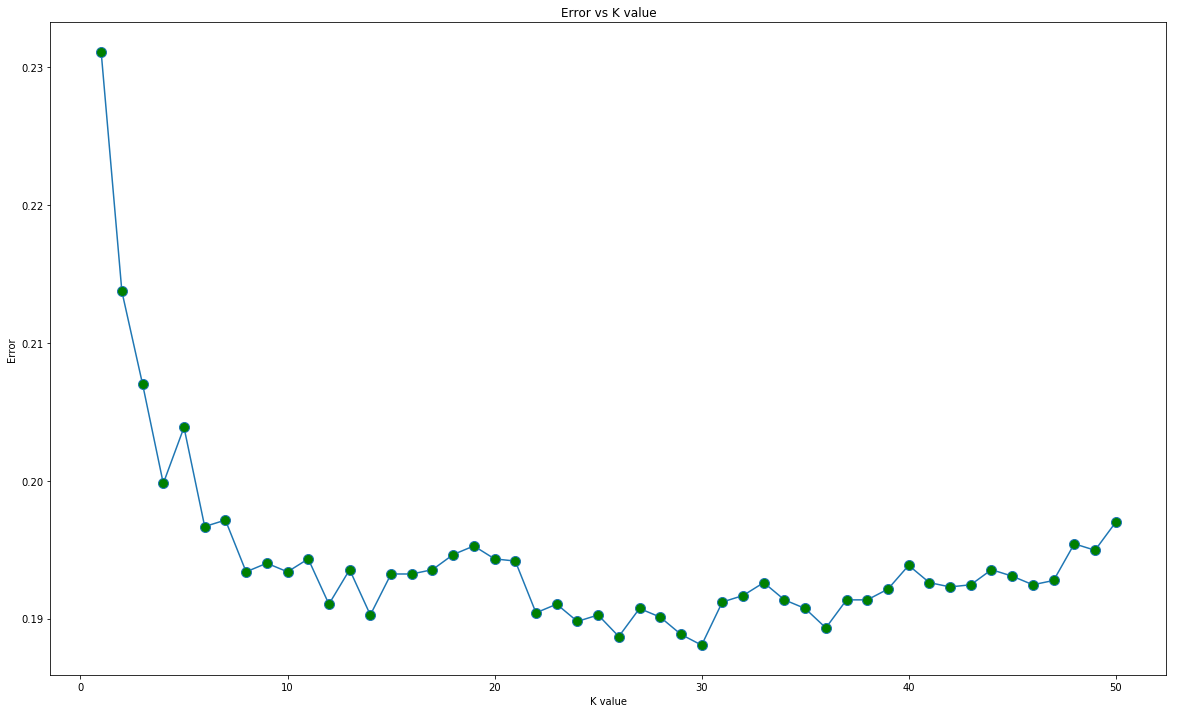

In [177]:
plt.figure(figsize=(20,12))
plt.plot(range(1,51), error, marker='o', markerfacecolor='green', markersize=10)
plt.title("Error vs K value")
plt.xlabel("K value")
plt.ylabel("Error")
plt.show()

In [178]:
min_error_index = np.argmin(error)
min_error_index

29

In [179]:
error[29]

0.18808630393996248

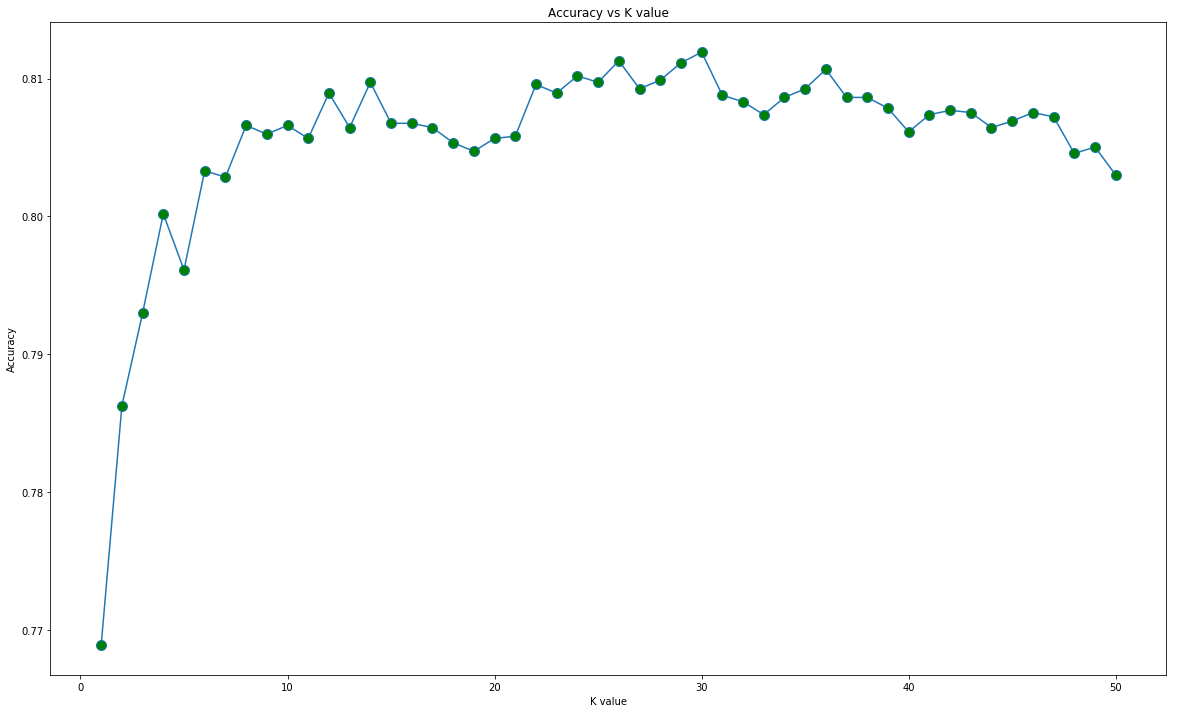

In [180]:
plt.figure(figsize=(20,12))
plt.plot(range(1,51), accuracy, marker='o', markerfacecolor='green', markersize=10)
plt.title("Accuracy vs K value")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()

In [181]:
max_accuracy_index = np.argmax(accuracy)
max_accuracy_index

29

In [182]:
accuracy[29]

0.8119136960600375

In [183]:
knnmodel30 = KNeighborsClassifier(n_neighbors=30)
knnmodel30.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=30, p=2,
           weights='uniform')

In [184]:
Y_train_predict=knnmodel30.predict(X_train)

In [185]:
ac=accuracy_score(Y_train_predict, Y_train)
ac

0.822805097334063

In [186]:
Y_test_predict = knnmodel30.predict(X_test)

In [187]:
ac=accuracy_score(Y_test_predict, Y_test)
ac
# still overfitting is there, but difference between training error and testing error is less

0.8119136960600375

In [188]:
from sklearn.model_selection import cross_val_score
crossvalscore=cross_val_score(knnmodel30,X,Y,cv=10)
crossvalscore

array([0.80775242, 0.80243826, 0.81212879, 0.80769231, 0.80362727,
       0.80950891, 0.81545199, 0.81889271, 0.82014388, 0.80512981])

In [189]:
crossvalscore.mean()

0.8102766356420267

#### Feature Scaling Analysis

A. Initially when 'capiyalgain' and 'capitalloss' were not featured scaled, the following were the metrics:
1. best accuracy was for n = 18
2. for n = 18, accuracy = 0.8511
3. for cv=10 and n=18, cross_val_score=0.8473

B. After feature scaling 'capitalgain' and 'capitalloss', the values were:
1. best accuracy was for n = 30
2. for n = 30, accuracy = 0.8119
3. for cv=10 and n=30, cross_val_score=0.8103

#### Like Logistic Rgression, for KNN Classifier also, Kfold validation didn't increase the accuracy